
# Project - Happiness Regression

# Import Libraries

In [86]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

In [87]:
df = pd.read_csv("happiness_score.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [88]:
df=df.drop('Country', axis=1)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [89]:
df=df.drop('Region', axis=1)
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [90]:
df.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [91]:
# Get unique and top values for the dataset
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [92]:
df.columns.values

array(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'], dtype=object)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [94]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [95]:
df.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [96]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

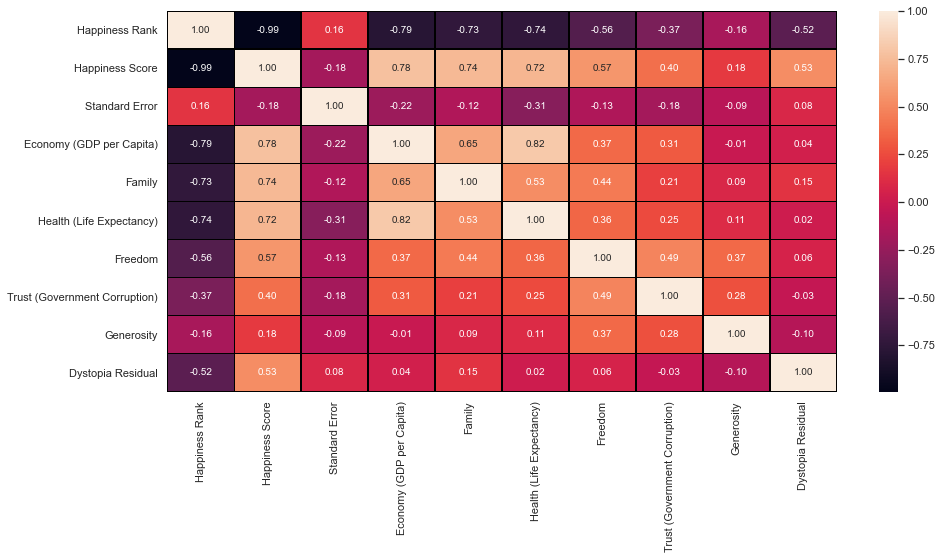

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

# Checking Outliers

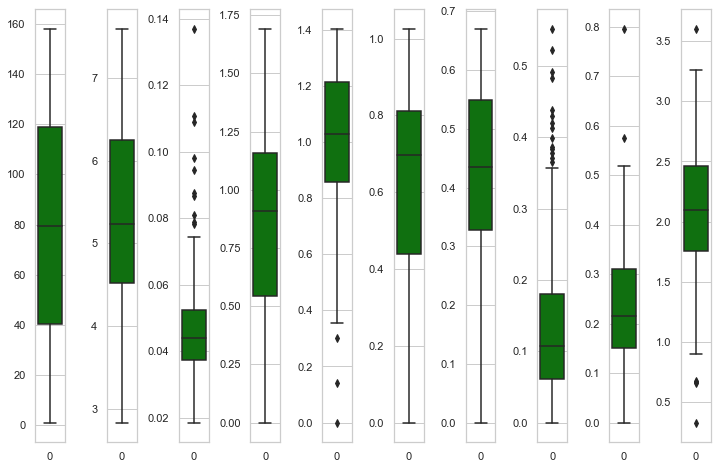

In [98]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [99]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

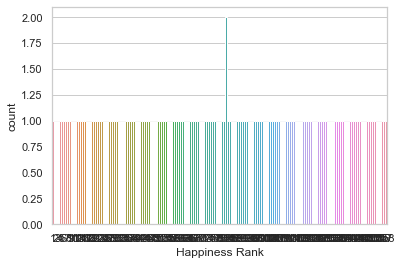

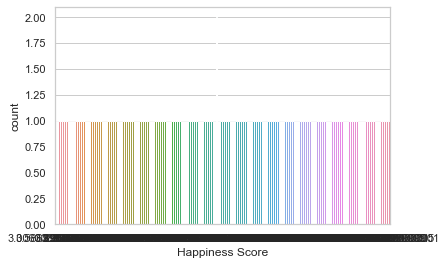

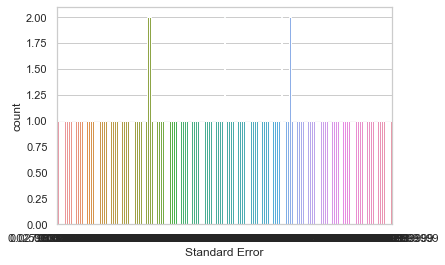

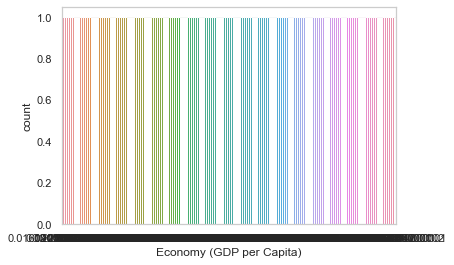

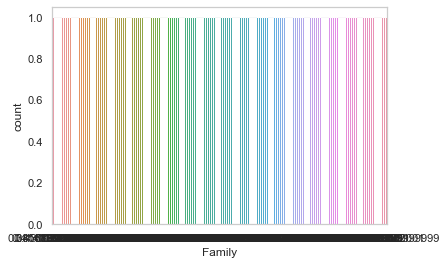

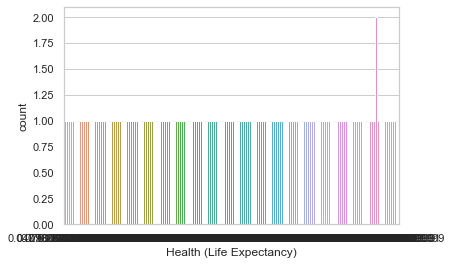

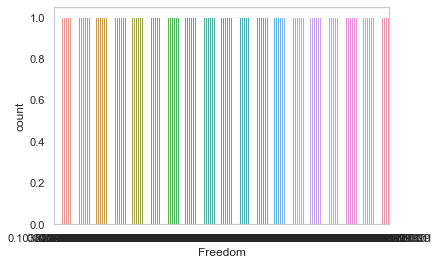

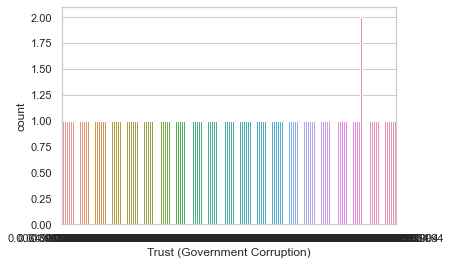

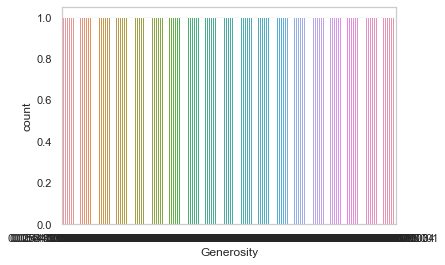

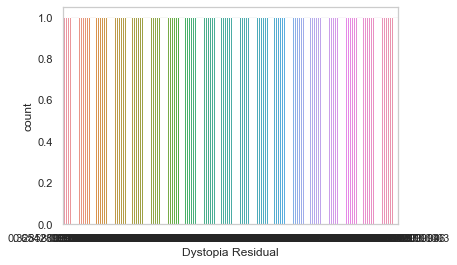

In [100]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i])
    sns.set(style='whitegrid')

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(158, 10)

In [102]:
df_zscore = (df - df.mean())/df.std()
df_zscore

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.715545,1.931219,-0.803371,1.365280,1.316097,1.259404,1.572438,2.302331,0.469547,0.755855
1,-1.693689,1.908512,0.055712,1.131628,1.509658,1.285347,1.328233,-0.016427,1.570862,1.089393
2,-1.671833,1.878818,-0.851779,1.189080,1.356740,0.989084,1.465001,2.833763,0.821680,0.710077
3,-1.649978,1.874451,-0.529841,1.520296,1.247954,1.031864,1.600044,1.846210,0.865884,0.661789
4,-1.628122,1.791483,-0.720554,1.191089,1.217334,1.114510,1.356104,1.550794,1.743021,0.637311
...,...,...,...,...,...,...,...,...,...,...
153,1.628398,-1.668749,-0.772461,-1.548065,-0.797983,-0.816016,1.084293,3.403102,-0.086952,-2.580720
154,1.650254,-1.777918,-0.660482,-1.387890,-2.339421,-1.259358,0.370854,-0.527532,-0.431744,-0.841292
155,1.672110,-2.069619,0.132114,-0.453802,-1.895061,0.371019,-1.803503,0.380210,1.851005,-3.198261
156,1.693966,-2.157827,2.256786,-2.061013,-2.111752,-1.644419,-2.057928,-0.356581,-0.315945,-0.480457


# Normal Distrubution curve

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

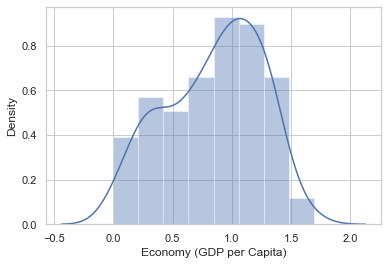

In [103]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

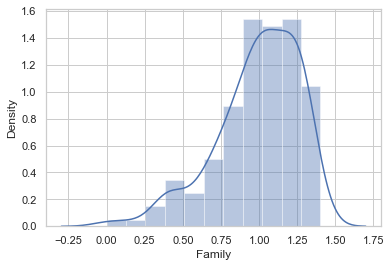

In [104]:
sns.distplot(df['Family'])

# Data Cleaning

In [105]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [106]:
df_new=[(z<3).all(axis=1)]
df_new

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [107]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [108]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.06341393,  1.85703444, -0.9722262 , ...,  1.75633466,
         1.7739906 ,  0.62239051],
       [-2.00849761,  1.83666843,  0.30934971, ...,  1.43994643,
         0.31599326,  1.48099498],
       [-1.95857395,  1.81000179, -1.06201663, ...,  1.6157332 ,
         1.90679206,  0.92797276],
       ...,
       [ 1.52535242, -2.20718029,  0.39913743, ..., -1.66865772,
         0.73891461,  1.65933595],
       [ 1.54254416, -2.3121775 ,  1.92690191, ..., -1.84990313,
        -0.15194623, -0.19482942],
       [ 1.55970548, -2.38132668,  1.31032295, ..., -0.50836227,
        -0.06732622, -0.49041465]])

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.06341393,  1.85703444, -0.9722262 , ...,  1.75633466,
         1.7739906 ,  0.62239051],
       [-2.00849761,  1.83666843,  0.30934971, ...,  1.43994643,
         0.31599326,  1.48099498],
       [-1.95857395,  1.81000179, -1.06201663, ...,  1.6157332 ,
         1.90679206,  0.92797276],
       ...,
       [ 1.52535242, -2.20718029,  0.39913743, ..., -1.66865772,
         0.73891461,  1.65933595],
       [ 1.54254416, -2.3121775 ,  1.92690191, ..., -1.84990313,
        -0.15194623, -0.19482942],
       [ 1.55970548, -2.38132668,  1.31032295, ..., -0.50836227,
        -0.06732622, -0.49041465]])

In [110]:
x

array([[-2.06341393,  1.85703444, -0.9722262 , ...,  1.75633466,
         1.7739906 ,  0.62239051],
       [-2.00849761,  1.83666843,  0.30934971, ...,  1.43994643,
         0.31599326,  1.48099498],
       [-1.95857395,  1.81000179, -1.06201663, ...,  1.6157332 ,
         1.90679206,  0.92797276],
       ...,
       [ 1.52535242, -2.20718029,  0.39913743, ..., -1.66865772,
         0.73891461,  1.65933595],
       [ 1.54254416, -2.3121775 ,  1.92690191, ..., -1.84990313,
        -0.15194623, -0.19482942],
       [ 1.55970548, -2.38132668,  1.31032295, ..., -0.50836227,
        -0.06732622, -0.49041465]])

In [111]:
x.shape


(158, 9)

In [112]:
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
153    0.67042
154    1.63328
155    0.32858
156    1.83302
157    1.56726
Name: Dystopia Residual, Length: 158, dtype: float64

# Linear Regression

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)


In [114]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)
lr1.coef_

array([-5.03659475e-01,  6.52792880e-01, -6.64977638e-05, -4.11092255e-01,
       -2.62159054e-01, -2.68576424e-01, -1.39196150e-01, -8.14196229e-02,
       -1.22088707e-01])

In [115]:
lr1.predict(x_test)
lr1.score(x_test,y_test)

0.9555833512802697

# Spliting Dataframe: 

In [116]:
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr1.fit(x_train,y_train)
    pred_train=lr1.predict(x_train)
    pred_test=lr1.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perform well")
        print("At random_state :-",i)
        print("Training r2_score:-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score:-",r2_score(y_test,pred_test)*100)

At random state 9 Model perform well
At random_state :- 9
Training r2_score:- 96.63447940558564
Testing r2_score:- 96.5734552605643
At random state 53 Model perform well
At random_state :- 53
Training r2_score:- 96.60430340525215
Testing r2_score:- 96.59123496593487
At random state 78 Model perform well
At random_state :- 78
Training r2_score:- 96.47741269319324
Testing r2_score:- 96.53351126270339


# Regularization ::L1, and L2 Regularization
        L1---- Lasso Regression
        L2----Ridge Regression

In [117]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9628395917079301

In [118]:
ls.predict(x_test)
ls.score(x_test,y_test)

0.9760795215962258

In [119]:
lrs=Ridge(alpha=0.001)
lrs.fit(x_train,y_train)
lrs.score(x_train,y_train)

0.9629334058238846

In [120]:
lrs.predict(x_test)
lrs.score(x_test,y_test)

0.9771467832947793

# Using ElasticNet

In [121]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
enr.predict(x_test)
enr.score(x_train,y_train)

0.9628902988634678

# Using SVR
Kernel: linear,rbf,poly

In [122]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.predict(x_test)
svr.score(x_train,y_train)

0.9611880986924394

In [123]:
svr=SVR(kernel="poly")
svr.fit(x_train,y_train)
svr.predict(x_test)
svr.score(x_train,y_train)

0.8559615414276828

In [124]:
svr=SVR(kernel="rbf")
svr.fit(x_train,y_train)
svr.predict(x_test)
svr.score(x_train,y_train)

0.9691658062150694

# Model Saving

In [125]:
import pickle
filename='Happiness.pkl'
pickle.dump(lrs,open(filename,'wb'))

# Conclusion

      Actual   Predict
57   2.59450  2.671970
74   2.20173  2.272390
149  1.99172  1.876825
119  2.86712  2.658691
131  0.67108  0.691467
4    2.45176  2.414321
43   2.23741  2.333266
142  0.99895  1.073927
8    2.26425  2.303386
78   1.63794  1.815141
14   2.51011  2.394782
91   2.45373  2.524482
111  1.95335  1.863361
121  2.44876  2.331461
134  1.59927  1.576613
86   2.02500  2.075953
16   1.96961  1.929430
155  0.32858  0.550174
132  1.95071  1.896900
24   2.84848  2.788972
103  1.24074  1.212771
9    2.26646  2.186350
84   2.63430  2.694942
146  1.85100  1.858786
143  1.87877  1.836786
109  1.69440  1.665774
82   2.10017  2.148735
87   1.26462  1.258702
46   2.21978  2.202936
92   1.73933  1.788415
117  2.20857  2.135803
148  1.94296  1.921482


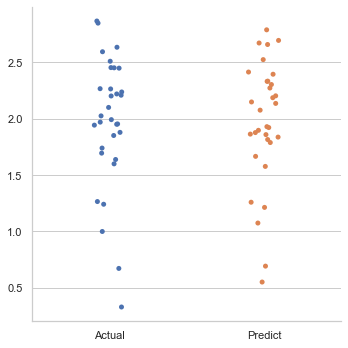

In [127]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=lrs.predict(x_test)

print(res)
sns.catplot(data=res)